In [1]:
import seaborn as sb
sb.set_palette('husl')
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
import hopsworks
import pandas as pd


In [21]:
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/221335
Connected. Call `.close()` to terminate connection gracefully.


In [66]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
wine_df['id'] = range(len(wine_df))
wine_df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,id
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,4


In [49]:
wine_df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [50]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  id                    6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [52]:
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
id                       0
dtype: int64

In [54]:
wine_df.type.unique()

array(['white', 'red'], dtype=object)

In [80]:
feature_descriptions = [
    {"name": "type", "description": "Categorizes the wine into different types, such as red or white."},
    {"name": "fixed_acidity", "description": "Concentration of non-volatile acids in the wine, influencing tartness and sharpness."},
    {"name": "volatile_acidity", "description": "Amount of acetic acid in the wine, which at high levels can lead to a vinegar taste."},
    {"name": "citric_acid", "description": "Key acid contributing to the freshness and flavor profile, significant in white wines."},
    {"name": "residual_sugar", "description": "Amount of sugar remaining post fermentation, determining if the wine is dry, semi-sweet, or sweet."},
    {"name": "chlorides", "description": "Amount of salt in the wine, where higher levels can impart a salty taste."},
    {"name": "free_sulfur_dioxide", "description": "Part of sulfur dioxide not bound to other molecules, important for preventing microbial growth and oxidation."},
    {"name": "total_sulfur_dioxide", "description": "Total amount of sulfur dioxide in the wine, crucial for preservation and preventing spoilage."},
    {"name": "density", "description": "Indication of the wine’s alcohol content and sweetness level."},
    {"name": "ph", "description": "Measures the acidity or basicity of the wine, usually between 3-4 on the pH scale."},
    {"name": "sulphates", "description": "Refers to sulfur dioxide addition, affecting taste and preservation of the wine."},
    {"name": "alcohol", "description": "Alcohol by volume (ABV) percentage in the wine, key in overall balance and taste profile."},
    {"name": "quality", "description": "Score or rating indicating the overall quality of the wine."},
]


In [67]:
# Transforming the 'type' feature into a numerical
wine_df['type'] = wine_df['type'].replace({'white': 0, 'red': 1})

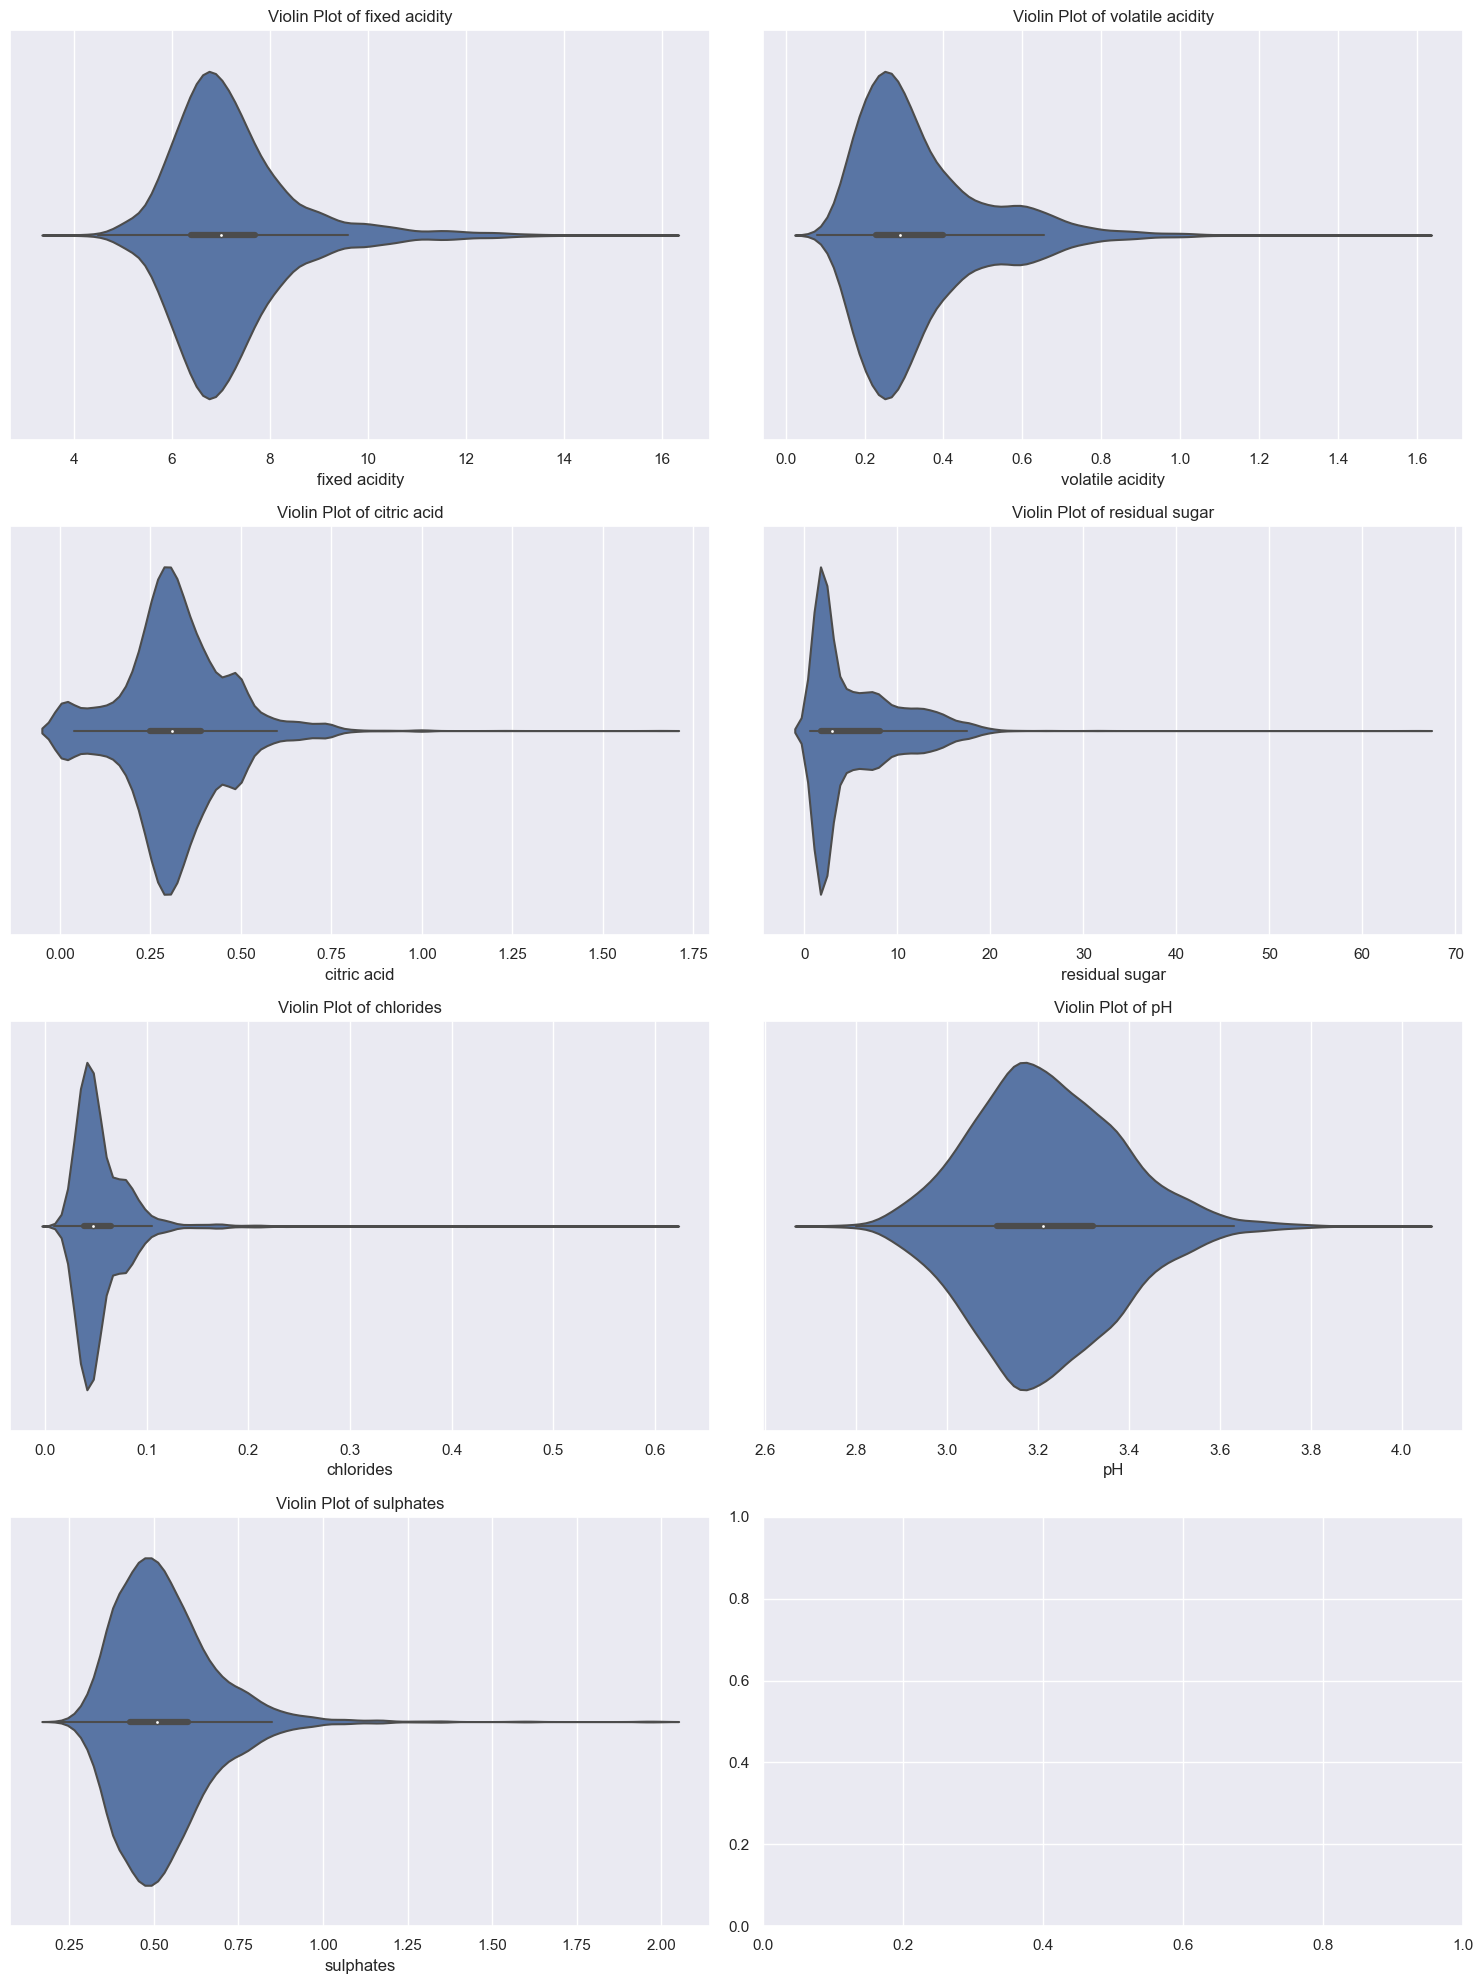

In [69]:
# Visualising the features with null values to replace the nulls
import math
columns_with_nulls = wine_df.columns[wine_df.isnull().any()]

# Number of rows for the subplot grid
num_rows = math.ceil(len(columns_with_nulls) / 2)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting box plots with enhanced edge visibility
for i, column in enumerate(columns_with_nulls):
    sb.violinplot(data=wine_df, x=column, ax=axes[i], orient='h')
    axes[i].set_title(f"Violin Plot of {column}")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [70]:
# Filling all null values with the median value
for column in wine_df.columns:
    median = wine_df[column].median()
    wine_df[column].fillna(median, inplace = True)

wine_df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
id                      0
dtype: int64

In [14]:
wine_df.corr()['quality']

type                   -0.119323
fixed acidity          -0.076931
volatile acidity       -0.265901
citric acid             0.085704
residual sugar         -0.036941
chlorides              -0.200742
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019350
sulphates               0.038770
alcohol                 0.444319
quality                 1.000000
id                     -0.064689
Name: quality, dtype: float64

In [16]:
import scipy.stats as stats

groups = wine_df.groupby('type')['quality'].apply(list)
anova_result = stats.f_oneway(*groups)
print(f"ANOVA test result for 'type': {anova_result}")

ANOVA test result for 'type': F_onewayResult(statistic=93.81180728653631, pvalue=4.888069044194755e-22)


### Pearson Correlation Results
This test assesses the linear relationship between each feature and the 'quality' of the wine. The correlation values range between -1 and 1, where values closer to -1 or 1 indicate a strong linear relationship, and values closer to 0 indicate a weak relationship.

- **High Correlation**: 
  - `alcohol` (0.444319): This shows a moderately strong positive relationship with quality. As the alcohol content increases, the quality of the wine tends to be higher.
  - `density` (-0.305858) and `volatile acidity` (-0.265901): These have moderate negative correlations with quality, meaning that as they increase, wine quality tends to decrease.

- **Low to Moderate Correlation**: 
  - `type` (-0.119323), `chlorides` (-0.200742), `citric acid` (0.085704), etc., show lower levels of correlation. While they do have some relationship with quality, it's not as pronounced.

- **Very Low Correlation**: 
  - `residual sugar` (-0.036941), `pH` (0.019350), `sulphates` (0.038770): These have very low correlation values, suggesting they might not have a strong linear relationship with the quality of the wine.

### ANOVA Test Result for 'Type'
The ANOVA test checks if there are statistically significant differences in wine quality between different types of wine (red or white). 

- The result (F-statistic: 93.81, p-value: ~0) indicates that there is a statistically significant difference in the quality of red and white wines. This suggests that 'type' is an important factor in predicting wine quality, despite its lower Pearson correlation coefficient.

### Interpretation and Recommendations
Based on the results, we will be dropping the features with very low correlation: residual sugar, ph and sulphates.



In [71]:
from datetime import datetime

# Assuming wine_df is your existing DataFrame

# Add a new column 'date_added' with today's date
wine_df["date_added"] = datetime.today().date()

# Show the DataFrame
print(wine_df)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            7.0             0.270         0.36            20.7   
1        0            6.3             0.300         0.34             1.6   
2        0            8.1             0.280         0.40             6.9   
3        0            7.2             0.230         0.32             8.5   
4        0            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492     1            6.2             0.600         0.08             2.0   
6493     1            5.9             0.550         0.10             2.2   
6494     1            6.3             0.510         0.13             2.3   
6495     1            5.9             0.645         0.12             2.0   
6496     1            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         

In [72]:
wine_df.columns = [column.replace(' ', '_').lower() for column in wine_df.columns]

wine_fg = fs.get_or_create_feature_group(
    name="wine_v2",
    version=2,
    primary_key=['id'], 
    description="Wine dataset")


In [75]:
wine_fg = fs.get_feature_group(name = 'wine_v2', version = 2)

In [76]:
wine_fg.insert(wine_df)

Uploading Dataframe: 0.00% |          | Rows 0/6497 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_v2_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/221335/jobs/named/wine_v2_2_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7ff05af3c970>, None)

In [77]:
fg = fs.get_feature_group(name='wine_v2', version=2)

# Using Hive to read the data
wine_df = fg.read(read_options={"use_hive": True})


Finished: Reading data from Hopsworks, using Hive (4.12s) 


In [78]:
wine_df

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id,date_added
0,1,9.2,0.46,0.23,2.6,0.091,18.0,77.0,0.99922,3.15,0.51,9.4,5,6123,2023-11-20
1,0,6.9,0.32,0.13,7.8,0.042,11.0,117.0,0.99600,3.23,0.37,9.2,5,2172,2023-11-20
2,1,12.3,0.39,0.63,2.3,0.091,6.0,18.0,1.00040,3.16,0.49,9.5,5,5331,2023-11-20
3,0,6.6,0.39,0.39,11.9,0.057,51.0,221.0,0.99851,3.26,0.51,8.9,6,3135,2023-11-20
4,1,8.0,0.38,0.06,1.8,0.078,12.0,49.0,0.99625,3.37,0.52,9.9,6,5129,2023-11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,5.7,0.45,0.42,1.1,0.051,61.0,197.0,0.99320,3.02,0.40,9.0,5,1947,2023-11-20
6493,0,5.9,0.30,0.30,2.0,0.030,38.0,142.0,0.98892,3.41,0.41,12.9,7,2671,2023-11-20
6494,0,6.6,0.24,0.22,12.3,0.051,35.0,146.0,0.99676,3.10,0.67,9.4,5,4395,2023-11-20
6495,0,8.3,0.36,0.57,15.0,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5,1942,2023-11-20


In [81]:
for desc in feature_descriptions: 
    fg.update_feature_description(desc["name"], desc["description"])